<a href="https://colab.research.google.com/github/RahmanSumaya/Bank-management-system-project-in-cpp/blob/main/myidea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas scikit-learn catboost lightgbm seaborn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9

In [ ]:
#import and read csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                           precision_score, recall_score, f1_score,
                           classification_report, confusion_matrix)
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
pf=pd.read_csv('/content/SEER Breast Cancer Dataset .csv')


In [ ]:
#data preprocessing
pf.columns = pf.columns.str.strip()
pf['affected nodes'] = pf['Reginol Node Positive'] / pf['Regional Node Examined']

pf.drop(['Unnamed: 3', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive'], axis=1, inplace=True)
pf["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
pf["N Stage"].replace({"N1":1, "N2": 2, "N3":3}, inplace=True)
pf["6th Stage"].replace({"IIA":1, "IIB": 2, "IIIA":3, "IIIB": 4,"IIIC":5}, inplace=True)
pf["Grade"].replace({"Moderately differentiated; Grade II": 2,
                            "Poorly differentiated; Grade III": 3,
                            "Well differentiated; Grade I": 1,
                            "Undifferentiated; anaplastic; Grade IV": 4}, inplace=True)
pf["A Stage"].replace({"Regional":1, "Distant": 0}, inplace=True)
pf["Estrogen Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
pf["Progesterone Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
pf["Status"].replace({"Alive":1, "Dead": 0}, inplace=True)
# Simplify the "Race" column before one-hot encoding
pf['Race'] = pf['Race'].replace({
    'American Indian/AK Native': 'Other',
    'Asian/Pacific Islander': 'Other'
    # Keep 'Black' and 'White' as-is
})

# Now one-hot encode (will create only 3 columns)
pf = pd.get_dummies(pf, columns=['Race'], prefix='Race')

# Group less common statuses into "Other"

pf['Marital Status'] = pf['Marital Status'].replace({
    'Divorced': 'Other',
    'Separated': 'Other',
    'Widowed': 'Other',
    # Keep 'Married' and 'Single' as-is
})

# Now one-hot encode (will create only 3 columns)
pf = pd.get_dummies(pf, columns=['Marital Status'], prefix='Marital_Status')

def categorize_survival(months):
    if months < 24:
        return 0
    elif months < 48:
        return 1
    elif months < 72:
        return 2
    elif months < 96:
        return 3
    else:
        return 4


pf['Survival_Category'] = pf['Survival Months'].apply(categorize_survival)





<ipython-input-31-6ba3de94f361>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pf["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
<ipython-input-31-6ba3de94f361>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pf["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=

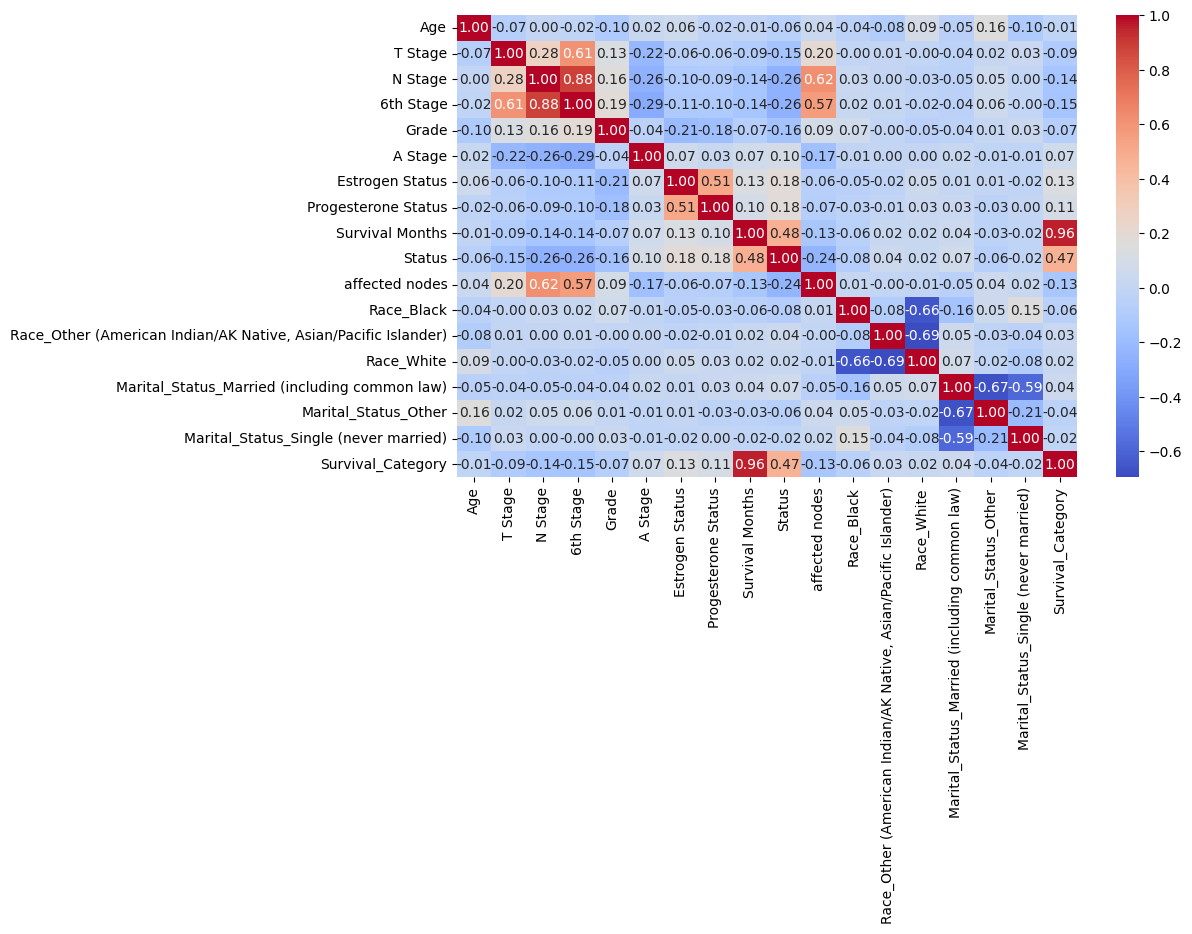

In [ ]:

# Compute correlation matrix

corr_matrix = pf.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


1. Features with high correlation (above 0.8 or below -0.8) are highly related.

2. If two independent features are highly correlated, remove one of them to avoid multicollinearity.

3. If a feature has a high correlation with the target variable, it may be important



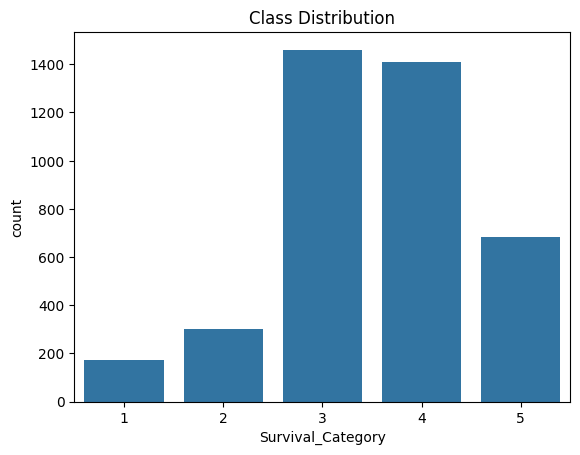

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=pf['Survival_Category'])
plt.title("Class Distribution")
plt.show()


In [ ]:
pf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age                                                             4024 non-null   int64  
 1   T Stage                                                         4024 non-null   int64  
 2   N Stage                                                         4024 non-null   int64  
 3   6th Stage                                                       4024 non-null   int64  
 4   Grade                                                           4024 non-null   int64  
 5   A Stage                                                         4024 non-null   int64  
 6   Estrogen Status                                                 4024 non-null   int64  
 7   Progesterone Status                                

In [ ]:
# splitting data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                pf.drop(['Survival_Category'], axis=1),
                pf['Survival_Category'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (3219, 17)
Shape of test set: (805, 17)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in kf.split(pf):
    X_train, X_test = pf.iloc[train_index].drop(columns=['Survival_Category']), pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train, y_test = pf.iloc[train_index]['Survival_Category'], pf.iloc[test_index]['Survival_Category']

    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)


In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Define target and features
X1 = pf.drop(columns=["Survival_Category"])  # Replace 'target' with your actual target column
y1 = pf["Survival_Category"]

# Compute MI for classification
mi_scores = mutual_info_classif(X1, y1)  # Use `mutual_info_regression(X, y)` for regression

# Convert to DataFrame and sort
mi_df = pd.DataFrame({'Feature': X1.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

# Display top features
print(mi_df)


                                              Feature  MI Score
8                                     Survival Months  1.365701
9                                              Status  0.128294
6                                     Estrogen Status  0.023847
7                                 Progesterone Status  0.017156
10                                     affected nodes  0.011920
4                                               Grade  0.007649
5                                             A Stage  0.007192
0                                                 Age  0.006990
1                                             T Stage  0.005419
13                                         Race_White  0.005227
2                                             N Stage  0.005087
16              Marital_Status_Single (never married)  0.003002
3                                           6th Stage  0.000635
11                                         Race_Black  0.000000
12  Race_Other (American Indian/AK Nativ



```
# This is formatted as code
```

Higher MI score → More important feature.

Features with very low MI scores contribute little information and may be dropped

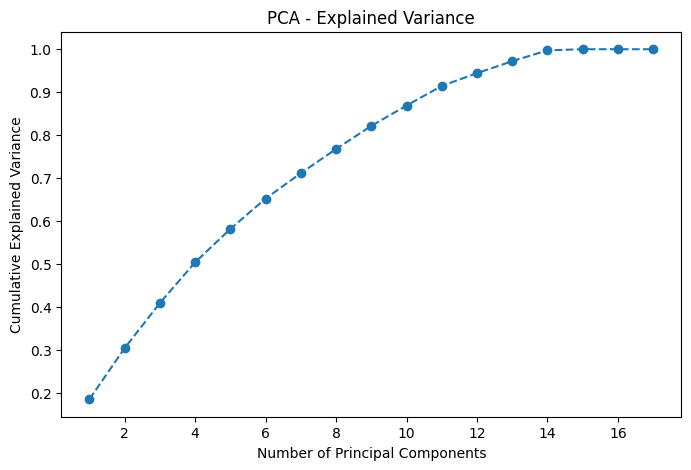

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled1)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()


In [ ]:
#standardising the data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [ ]:
category_order = ['1', '2', '3', '4', '5']

pf['Survival_Category'] = pd.Categorical(
    pf['Survival_Category'],
    categories=category_order,
    ordered=True  # Treats as ordered categories
)

# Now when you check value_counts(), it will print in the correct order
print(pf['Survival_Category'].value_counts().sort_index())


Survival_Category
1     173
2     300
3    1461
4    1408
5     682
Name: count, dtype: int64


**DECISION TREE**

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize results dictionary
dt_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold Cross Validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
    #standardising the data

    from sklearn.preprocessing import StandardScaler

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)

    # Model training
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

    # Store metrics
    dt_results['accuracy'].append(accuracy_score(y_test, y_pred))
    dt_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    dt_results['precision'].append(precision_score(y_test, y_pred, average=None))
    dt_results['recall'].append(recall_score(y_test, y_pred, average=None))
    dt_results['f1'].append(f1_score(y_test, y_pred, average=None))

# Results summary
print("\n=== Decision Tree Performance ===")
print(f"Average Accuracy: {np.mean(dt_results['accuracy']):.2%} (±{np.std(dt_results['accuracy']):.2%})")
print(f"Average Balanced Accuracy: {np.mean(dt_results['balanced_accuracy']):.2%} (±{np.std(dt_results['balanced_accuracy']):.2%})")
print(f"Average Recall: {np.mean([np.mean(r) for r in dt_results['recall']]):.2%} (±{np.std([np.mean(r) for r in dt_results['recall']]):.2%})")
print(f"Average F1 Score: {np.mean([np.mean(f) for f in dt_results['f1']]):.2%} (±{np.std([np.mean(f) for f in dt_results['f1']]):.2%})")

# Best iteration
best_idx = np.argmax(dt_results['accuracy'])
print("\n=== Best Iteration ===")
print(f"Accuracy: {dt_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {dt_results['balanced_accuracy'][best_idx]:.2%}")


Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)

=== Decision Tree Performance ===
Average Accuracy: 94.91% (±2.99%)
Average Balanced Accuracy: 93.94% (±2.57%)
Average Recall: 93.94% (±2.57%)
Average F1 Score: 92.77% (±4.04%)

=== Best Iteration ===
Accuracy: 98.81%
Balanced Accuracy: 96.05%


In [ ]:

# Compute performance metrics for each class
classwise_precision = precision_score(y_test, y_pred, average=None)
classwise_recall = recall_score(y_test, y_pred, average=None)
classwise_f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to display the class-wise metrics
class_labels = sorted(y_test.unique())  # Ensure correct class order
metrics_df = pd.DataFrame({
    "Class": class_labels,
    "Precision": classwise_precision,
    "Recall": classwise_recall,
    "F1-score": classwise_f1
})

# Print overall metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.2%}")

# Print class-wise metrics
print("\nClass-wise Performance:")
print(metrics_df)


Accuracy: 96.02%
Balanced Accuracy: 96.77%

Class-wise Performance:
  Class  Precision    Recall  F1-score
0     1   0.976744  1.000000  0.988235
1     2   0.818182  0.984375  0.893617
2     3   0.969945  0.962060  0.965986
3     4   0.960000  0.968300  0.964132
4     5   1.000000  0.923913  0.960452


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np

# Random Forest results dictionary
rf_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold Cross Validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
    from sklearn.preprocessing import StandardScaler

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)
    # Initialize and train Random Forest model
    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',  # Handles class imbalance
        max_features='sqrt'       # Reduces feature correlation
    )
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)

    # Store results
    rf_results['accuracy'].append(accuracy_score(y_test, y_pred))
    rf_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    rf_results['precision'].append(precision_score(y_test, y_pred, average=None))
    rf_results['recall'].append(recall_score(y_test, y_pred, average=None))
    rf_results['f1'].append(f1_score(y_test, y_pred, average=None))

# Compute average performance
avg_accuracy = np.mean(rf_results['accuracy'])
avg_balanced_accuracy = np.mean(rf_results['balanced_accuracy'])
avg_recall = np.mean([np.mean(r) for r in rf_results['recall']])
avg_f1 = np.mean([np.mean(f) for f in rf_results['f1']])

# Print metrics
print("\n=== Random Forest Performance ===")
print(f"Average Accuracy: {avg_accuracy:.2%} (±{np.std(rf_results['accuracy']):.2%})")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%} (±{np.std(rf_results['balanced_accuracy']):.2%})")
print(f"Average Recall: {avg_recall:.2%} (±{np.std([np.mean(r) for r in rf_results['recall']]):.2%})")
print(f"Average F1 Score: {avg_f1:.2%} (±{np.std([np.mean(f) for f in rf_results['f1']]):.2%})")

# Best iteration (based on accuracy)
best_idx = np.argmax(rf_results['accuracy'])
print("\n=== Best Iteration ===")
print(f"Accuracy: {rf_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {rf_results['balanced_accuracy'][best_idx]:.2%}")


Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)

=== Random Forest Performance ===
Average Accuracy: 94.98% (±2.43%)
Average Balanced Accuracy: 92.72% (±2.88%)
Average Recall: 92.72% (±2.88%)
Average F1 Score: 92.49% (±3.72%)

=== Best Iteration ===
Accuracy: 98.21%
Balanced Accuracy: 94.32%


In [ ]:

# Compute performance metrics for each class
classwise_precision = precision_score(y_test, y_pred, average=None)
classwise_recall = recall_score(y_test, y_pred, average=None)
classwise_f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to display the class-wise metrics
class_labels = sorted(y_test.unique())  # Ensure correct class order
metrics_df = pd.DataFrame({
    "Class": class_labels,
    "Precision": classwise_precision,
    "Recall": classwise_recall,
    "F1-score": classwise_f1
})

# Print overall metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.2%}")

# Print class-wise metrics
print("\nClass-wise Performance:")
print(metrics_df)


Accuracy: 96.22%
Balanced Accuracy: 96.57%

Class-wise Performance:
   Class  Precision    Recall  F1-score
0      0   0.976744  1.000000  0.988235
1      1   0.873239  0.968750  0.918519
2      2   0.965147  0.975610  0.970350
3      3   0.957143  0.965418  0.961263
4      4   1.000000  0.918478  0.957507


**SVM MODEL**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# SVM results storage
svm_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold Cross Validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train SVM model
    svm = SVC(kernel='rbf', C=1000.0, gamma='auto', random_state=42)
    svm.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = svm.predict(X_test_scaled)

    # Store results
    svm_results['accuracy'].append(accuracy_score(y_test, y_pred))
    svm_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    svm_results['precision'].append(precision_score(y_test, y_pred, average=None, zero_division=0))
    svm_results['recall'].append(recall_score(y_test, y_pred, average=None, zero_division=0))
    svm_results['f1'].append(f1_score(y_test, y_pred, average=None, zero_division=0))

# Calculate average performance
avg_accuracy = np.mean(svm_results['accuracy'])
avg_balanced_accuracy = np.mean(svm_results['balanced_accuracy'])
avg_recall = np.mean([np.mean(r) for r in svm_results['recall']])
avg_f1 = np.mean([np.mean(f) for f in svm_results['f1']])

# Print metrics
print("\n===== SVM Performance =====")
print(f"Average Accuracy: {avg_accuracy:.2%} (±{np.std(svm_results['accuracy']):.2%})")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%} (±{np.std(svm_results['balanced_accuracy']):.2%})")
print(f"Average Recall: {avg_recall:.2%} (±{np.std([np.mean(r) for r in svm_results['recall']]):.2%})")
print(f"Average F1 Score: {avg_f1:.2%} (±{np.std([np.mean(f) for f in svm_results['f1']]):.2%})")

# Best iteration (based on accuracy)
best_idx = np.argmax(svm_results['accuracy'])
print("\n=== Best SVM Iteration ===")
print(f"Accuracy: {svm_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {svm_results['balanced_accuracy'][best_idx]:.2%}")


Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)

===== SVM Performance =====
Average Accuracy: 93.79% (±0.92%)
Average Balanced Accuracy: 89.83% (±1.59%)
Average Recall: 89.83% (±1.59%)
Average F1 Score: 90.09% (±1.17%)

=== Best SVM Iteration ===
Accuracy: 95.13%
Balanced Accuracy: 92.24%


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# KNN results storage
knn_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold Cross Validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': list(range(1, 30)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    # Initialize the KNN model
    knn = KNeighborsClassifier()

    # Use GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Best model
    best_knn = grid_search.best_estimator_

    # Predict on test set
    y_pred_knn = best_knn.predict(X_test_scaled)

    # Store results
    knn_results['accuracy'].append(accuracy_score(y_test, y_pred_knn))
    knn_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred_knn))
    knn_results['precision'].append(precision_score(y_test, y_pred_knn, average=None, zero_division=0))
    knn_results['recall'].append(recall_score(y_test, y_pred_knn, average=None, zero_division=0))
    knn_results['f1'].append(f1_score(y_test, y_pred_knn, average=None, zero_division=0))

# Calculate average performance
avg_accuracy = np.mean(knn_results['accuracy'])
avg_balanced_accuracy = np.mean(knn_results['balanced_accuracy'])
avg_recall = np.mean([np.mean(r) for r in knn_results['recall']])
avg_f1 = np.mean([np.mean(f) for f in knn_results['f1']])

# Print metrics
print("\n===== KNN Performance =====")
print(f"Average Accuracy: {avg_accuracy:.2%} (±{np.std(knn_results['accuracy']):.2%})")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%} (±{np.std(knn_results['balanced_accuracy']):.2%})")
print(f"Average Recall: {avg_recall:.2%} (±{np.std([np.mean(r) for r in knn_results['recall']]):.2%})")
print(f"Average F1 Score: {avg_f1:.2%} (±{np.std([np.mean(f) for f in knn_results['f1']]):.2%})")

# Best iteration (based on accuracy)
best_idx_knn = np.argmax(knn_results['accuracy'])
print("\n=== Best KNN Iteration ===")
print(f"Accuracy: {knn_results['accuracy'][best_idx_knn]:.2%}")
print(f"Balanced Accuracy: {knn_results['balanced_accuracy'][best_idx_knn]:.2%}")


Train size: (3018, 17), Test size: (1006, 17)
Fitting 5 folds for each of 174 candidates, totalling 870 fits
Train size: (3018, 17), Test size: (1006, 17)
Fitting 5 folds for each of 174 candidates, totalling 870 fits
Train size: (3018, 17), Test size: (1006, 17)
Fitting 5 folds for each of 174 candidates, totalling 870 fits
Train size: (3018, 17), Test size: (1006, 17)
Fitting 5 folds for each of 174 candidates, totalling 870 fits

===== KNN Performance =====
Average Accuracy: 75.97% (±1.33%)
Average Balanced Accuracy: 60.94% (±1.46%)
Average Recall: 60.94% (±1.46%)
Average F1 Score: 64.61% (±1.58%)

=== Best KNN Iteration ===
Accuracy: 78.23%
Balanced Accuracy: 62.08%


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Store results
xgb_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold Cross Validation setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
    # Initialize XGBoost Classifier
    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax' if len(np.unique(y_train)) > 2 else 'binary:logistic',
        num_class=len(np.unique(y_train)) if len(np.unique(y_train)) > 2 else None,
        eval_metric='mlogloss' if len(np.unique(y_train)) > 2 else 'logloss',
        use_label_encoder=False,
        random_state=42
    )

    # Train model
    xgb_model.fit(X_train, y_train)

    # Predict
    y_pred = xgb_model.predict(X_test)

    # Store metrics
    xgb_results['accuracy'].append(accuracy_score(y_test, y_pred))
    xgb_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    xgb_results['precision'].append(precision_score(y_test, y_pred, average=None))
    xgb_results['recall'].append(recall_score(y_test, y_pred, average=None))
    xgb_results['f1'].append(f1_score(y_test, y_pred, average=None))

# Calculate average performance
avg_accuracy = np.mean(xgb_results['accuracy'])
avg_balanced_accuracy = np.mean(xgb_results['balanced_accuracy'])
avg_recall = np.mean(xgb_results['recall'])
avg_f1 = np.mean(xgb_results['f1'])

# Print metrics
print(f"Average Accuracy: {avg_accuracy:.2%}")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%}")
print(f"Average Recall: {avg_recall:.2%}")
print(f"Average F1 Score: {avg_f1:.2%}")

# Best iteration (based on accuracy)
best_idx = np.argmax(xgb_results['accuracy'])
print("\n=== Best Iteration ===")
print(f"Accuracy: {xgb_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {xgb_results['balanced_accuracy'][best_idx]:.2%}")


Train size: (3018, 17), Test size: (1006, 17)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:55:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train size: (3018, 17), Test size: (1006, 17)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:55:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:55:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train size: (3018, 17), Test size: (1006, 17)
Train size: (3018, 17), Test size: (1006, 17)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:55:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Average Accuracy: 100.00%
Average Balanced Accuracy: 100.00%
Average Recall: 100.00%
Average F1 Score: 100.00%

=== Best Iteration ===
Accuracy: 100.00%
Balanced Accuracy: 100.00%


**CATBOOST**

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize K-Fold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Store metrics
catboost_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold Cross-Validation Loop
for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize CatBoost Classifier
    cat_clf = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        verbose=0,  # Suppress CatBoost output (set to 100 if you want logs)
        random_seed=42
    )

    # Train the model
    cat_clf.fit(X_train_scaled, y_train)

    # Predict
    y_pred = cat_clf.predict(X_test_scaled)

    # Store metrics
    catboost_results['accuracy'].append(accuracy_score(y_test, y_pred))
    catboost_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    catboost_results['precision'].append(precision_score(y_test, y_pred, average=None))
    catboost_results['recall'].append(recall_score(y_test, y_pred, average=None))
    catboost_results['f1'].append(f1_score(y_test, y_pred, average=None))

# Calculate average performance
avg_accuracy = np.mean(catboost_results['accuracy'])
avg_balanced_accuracy = np.mean(catboost_results['balanced_accuracy'])
avg_recall = np.mean(catboost_results['recall'])
avg_f1 = np.mean(catboost_results['f1'])

# Print metrics
print("\n=== CatBoost Performance Summary ===")
print(f"Average Accuracy: {avg_accuracy:.2%}")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%}")
print(f"Average Recall: {avg_recall:.2%}")
print(f"Average F1 Score: {avg_f1:.2%}")

# Best iteration (based on accuracy)
best_idx = np.argmax(catboost_results['accuracy'])
print("\n=== Best Fold ===")
print(f"Accuracy: {catboost_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {catboost_results['balanced_accuracy'][best_idx]:.2%}")



Train size: (3018, 17), Test size: (1006, 17)

Train size: (3018, 17), Test size: (1006, 17)

Train size: (3018, 17), Test size: (1006, 17)

Train size: (3018, 17), Test size: (1006, 17)

=== CatBoost Performance Summary ===
Average Accuracy: 100.00%
Average Balanced Accuracy: 100.00%
Average Recall: 100.00%
Average F1 Score: 100.00%

=== Best Fold ===
Accuracy: 100.00%
Balanced Accuracy: 100.00%


**ADABOOST**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import numpy as np

# K-Fold setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# ------------------ Classification ------------------
clf_results = {
    'accuracy': [],
    'balanced_accuracy': []
}

# Define the parameter grid for AdaBoostClassifier
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 3, 5]  # max_depth for the DecisionTreeClassifier
}

for train_index, test_index in kf.split(pf):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"\n[Classifier] Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Initialize AdaBoostClassifier with a base estimator (DecisionTreeClassifier)
    ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(ada_clf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')

    # Fit grid search
    grid_search.fit(X_train, y_train)

    # Best model
    best_ada_clf = grid_search.best_estimator_

    # Predict with the best model
    y_pred = best_ada_clf.predict(X_test)

    # Store results
    clf_results['accuracy'].append(accuracy_score(y_test, y_pred))
    clf_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))

# Display results
print("\n=== AdaBoost Classifier Performance ===")
print(f"Average Accuracy: {np.mean(clf_results['accuracy']):.4f}")
print(f"Average Balanced Accuracy: {np.mean(clf_results['balanced_accuracy']):.4f}")
print(f"Best Parameters: {grid_search.best_params_}")



[Classifier] Train size: (3018, 17), Test size: (1006, 17)

[Classifier] Train size: (3018, 17), Test size: (1006, 17)

[Classifier] Train size: (3018, 17), Test size: (1006, 17)

[Classifier] Train size: (3018, 17), Test size: (1006, 17)

=== AdaBoost Classifier Performance ===
Average Accuracy: 0.9254
Average Balanced Accuracy: 0.8000
Best Parameters: {'estimator__max_depth': 1, 'learning_rate': 1, 'n_estimators': 50}


**LIGHTGBM**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import numpy as np

# K-Fold setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Store results
lgb_results = {
    'accuracy': [],
    'balanced_accuracy': []
}

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(kf.split(pf), 1):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"\n[Fold {fold}] Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train_scaled, label=y_train)
    test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

    # Train model
    gbm = lgb.train(
        params,
        train_data,
        num_boost_round=500,
        valid_sets=[test_data],
        valid_names=["eval"],
        callbacks=[lgb.early_stopping(20, verbose=False)]
    )

    # Predict
    y_pred = gbm.predict(X_test_scaled, num_iteration=gbm.best_iteration)
    y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

    # Metrics
    acc = accuracy_score(y_test, y_pred_binary)
    bal_acc = balanced_accuracy_score(y_test, y_pred_binary)

    lgb_results['accuracy'].append(acc)
    lgb_results['balanced_accuracy'].append(bal_acc)

# Summary of results
print("\n=== LightGBM Cross-Validation Results ===")
print(f"Average Accuracy: {np.mean(lgb_results['accuracy']):.4f}")
print(f"Average Balanced Accuracy: {np.mean(lgb_results['balanced_accuracy']):.4f}")

best_idx = np.argmax(lgb_results['accuracy'])
print(f"\nBest Fold Accuracy: {lgb_results['accuracy'][best_idx]:.4f}")
print(f"Best Fold Balanced Accuracy: {lgb_results['balanced_accuracy'][best_idx]:.4f}")



[Fold 1] Train size: (3018, 17), Test size: (1006, 17)

[Fold 2] Train size: (3018, 17), Test size: (1006, 17)

[Fold 3] Train size: (3018, 17), Test size: (1006, 17)

[Fold 4] Train size: (3018, 17), Test size: (1006, 17)

=== LightGBM Cross-Validation Results ===
Average Accuracy: 0.1175
Average Balanced Accuracy: 0.4000

Best Fold Accuracy: 0.1402
Best Fold Balanced Accuracy: 0.4000


**NATIVE BIAS (Gaussian)**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize result dictionary
nb_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(pf), 1):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"\n[Fold {fold}] Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = nb_model.predict(X_test_scaled)

    # Append metrics
    nb_results['accuracy'].append(accuracy_score(y_test, y_pred))
    nb_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    nb_results['precision'].append(precision_score(y_test, y_pred, average=None))
    nb_results['recall'].append(recall_score(y_test, y_pred, average=None))
    nb_results['f1'].append(f1_score(y_test, y_pred, average=None))

# Calculate average performance
avg_accuracy = np.mean(nb_results['accuracy'])
avg_balanced_accuracy = np.mean(nb_results['balanced_accuracy'])
avg_recall = np.mean(nb_results['recall'], axis=0)
avg_f1 = np.mean(nb_results['f1'], axis=0)

# Print average metrics
print("\n=== GaussianNB Cross-Validation Results ===")
print(f"Average Accuracy: {avg_accuracy:.2%}")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%}")
print(f"Average Recall (per class): {avg_recall}")
print(f"Average F1 Score (per class): {avg_f1}")

# Best iteration (based on accuracy)
best_idx = np.argmax(nb_results['accuracy'])
print("\n=== Best Fold ===")
print(f"Accuracy: {nb_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {nb_results['balanced_accuracy'][best_idx]:.2%}")



[Fold 1] Train size: (3018, 17), Test size: (1006, 17)

[Fold 2] Train size: (3018, 17), Test size: (1006, 17)

[Fold 3] Train size: (3018, 17), Test size: (1006, 17)

[Fold 4] Train size: (3018, 17), Test size: (1006, 17)

=== GaussianNB Cross-Validation Results ===
Average Accuracy: 90.73%
Average Balanced Accuracy: 88.78%
Average Recall (per class): [0.9075478  0.7412799  0.8961798  0.92615101 0.96804968]
Average F1 Score (per class): [0.90000438 0.68805965 0.91066783 0.93611755 0.9456021 ]

=== Best Fold ===
Accuracy: 91.65%
Balanced Accuracy: 89.21%


# **DEEP LEARNING MODELS**

**TabNet**

In [ ]:
!pip install torch torchvision torchaudio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.0 MB/s eta 0:00:00


In [ ]:
!pip install pytorch-tabnet --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Results dictionary
tabnet_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

kf = KFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(pf), 1):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category'].values
    y_test = pf.iloc[test_index]['Survival_Category'].values

    print(f"\n[Fold {fold}] Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize TabNet model
    tabnet_model = TabNetClassifier(
        n_d=8, n_a=8, n_steps=3,
        gamma=1.3,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size": 10, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        verbose=0
    )

    # Train model
    tabnet_model.fit(
        X_train=X_train_scaled,
        y_train=y_train,
        eval_set=[(X_test_scaled, y_test)],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )

    # Predict
    y_pred = tabnet_model.predict(X_test_scaled)

    # Append metrics
    tabnet_results['accuracy'].append(accuracy_score(y_test, y_pred))
    tabnet_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    tabnet_results['precision'].append(precision_score(y_test, y_pred, average='macro'))
    tabnet_results['recall'].append(recall_score(y_test, y_pred, average='macro'))
    tabnet_results['f1'].append(f1_score(y_test, y_pred, average='macro'))

# Average results
avg_accuracy = np.mean(tabnet_results['accuracy'])
avg_balanced_accuracy = np.mean(tabnet_results['balanced_accuracy'])
avg_precision = np.mean(tabnet_results['precision'])
avg_recall = np.mean(tabnet_results['recall'])
avg_f1 = np.mean(tabnet_results['f1'])

# Print average performance
print("\n=== TabNet Cross-Validation Results ===")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

# Best performing fold
best_idx = np.argmax(tabnet_results['accuracy'])
print("\n=== Best Fold ===")
print(f"Accuracy: {tabnet_results['accuracy'][best_idx]:.4f}")
print(f"Balanced Accuracy: {tabnet_results['balanced_accuracy'][best_idx]:.4f}")



[Fold 1] Train size: (3018, 17), Test size: (1006, 17)

Early stopping occurred at epoch 63 with best_epoch = 53 and best_val_0_accuracy = 0.97714

[Fold 2] Train size: (3018, 17), Test size: (1006, 17)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 47 with best_epoch = 37 and best_val_0_accuracy = 0.98012

[Fold 3] Train size: (3018, 17), Test size: (1006, 17)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_accuracy = 0.97714

[Fold 4] Train size: (3018, 17), Test size: (1006, 17)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_accuracy = 0.9831

=== TabNet Cross-Validation Results ===
Average Accuracy: 0.9794
Average Balanced Accuracy: 0.9598
Average Precision: 0.9647
Average Recall: 0.9598
Average F1 Score: 0.9617

=== Best Fold ===
Accuracy: 0.9831
Balanced Accuracy: 0.9763


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
import torch
print(torch.__version__)

from pytorch_tabnet.tab_model import TabNetClassifier


2.6.0+cu124


**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Result dictionary
mlp_results = {
    'accuracy': [],
    'balanced_accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# K-Fold setup
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(pf), 1):
    X_train = pf.iloc[train_index].drop(columns=['Survival_Category'])
    X_test = pf.iloc[test_index].drop(columns=['Survival_Category'])
    y_train = pf.iloc[train_index]['Survival_Category']
    y_test = pf.iloc[test_index]['Survival_Category']

    print(f"\n[Fold {fold}] Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    mlp_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = mlp_model.predict(X_test_scaled)

    # Append metrics
    mlp_results['accuracy'].append(accuracy_score(y_test, y_pred))
    mlp_results['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
    mlp_results['precision'].append(precision_score(y_test, y_pred, average=None))
    mlp_results['recall'].append(recall_score(y_test, y_pred, average=None))
    mlp_results['f1'].append(f1_score(y_test, y_pred, average=None))

# Average results
avg_accuracy = np.mean(mlp_results['accuracy'])
avg_balanced_accuracy = np.mean(mlp_results['balanced_accuracy'])
avg_recall = np.mean(mlp_results['recall'], axis=0)
avg_f1 = np.mean(mlp_results['f1'], axis=0)

# Print averages
print("\n=== MLPClassifier Cross-Validation Results ===")
print(f"Average Accuracy: {avg_accuracy:.2%}")
print(f"Average Balanced Accuracy: {avg_balanced_accuracy:.2%}")
print(f"Average Recall (per class): {avg_recall}")
print(f"Average F1 Score (per class): {avg_f1}")

# Best fold
best_idx = np.argmax(mlp_results['accuracy'])
print("\n=== Best Fold ===")
print(f"Accuracy: {mlp_results['accuracy'][best_idx]:.2%}")
print(f"Balanced Accuracy: {mlp_results['balanced_accuracy'][best_idx]:.2%}")



[Fold 1] Train size: (3018, 17), Test size: (1006, 17)

[Fold 2] Train size: (3018, 17), Test size: (1006, 17)

[Fold 3] Train size: (3018, 17), Test size: (1006, 17)

[Fold 4] Train size: (3018, 17), Test size: (1006, 17)

=== MLPClassifier Cross-Validation Results ===
Average Accuracy: 97.04%
Average Balanced Accuracy: 94.76%
Average Recall (per class): [0.91158202 0.88264952 0.98348903 0.97784461 0.98239521]
Average F1 Score (per class): [0.91017516 0.89231569 0.98184955 0.98061329 0.97458105]

=== Best Fold ===
Accuracy: 98.01%
Balanced Accuracy: 95.37%
